# Seminar 17.

# Linear programming. Simplex method
(main reference is [this book](https://www.amazon.com/Introduction-Linear-Optimization-Scientific-Computation/dp/1886529191))

## Current place in syllabus

- Unconstrained optimization
    - ~~One dimensional mimnimization~~
    - ~~Gradient descent~~
    - ~~Newton method and quasi-Newton methods~~
    - ~~Conjugate gradient method~~
- Constrained optimization
    - <span style="color:red">Linear programming: simplex method</span>
    - Linear programming: primal barrier method
    - Projected gradient method and Frank-Wolfe method
    - Penalty and barrier function methods
    - Augmented Lagrangian method
    - Sequaential quadratic programming
- Other topics
    - ~~Least squares problem~~
    - Proximal methods
    - Optimal methods and lower bounds
    - Mirror descent
    - Review of stochastic methods

## Problem statement
Given vectors $c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ and matrix $A \in \mathbb{R}^{m \times n}$ such that $m < n$ and $\mathrm{rank}(A) = m$ 
- Standard form
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}
- Canonical form (below we consider this form)
\begin{align*}
&\min_x c^{\top}x \\
\text{s.t. } & Ax = b\\
& x_i \geq 0, \; i = 1,\dots, n
\end{align*}

### Reformulation of the forms

- $Ax = b \equiv 
\begin{cases}
Ax \leq b\\
Ax \geq b
\end{cases}
$
- $Ax \leq b \equiv 
\begin{cases}
Ax + z =  b\\
z \geq 0
\end{cases}$ 
- free variable $x \equiv 
\begin{cases}
x = u - v\\
u \geq 0, \; v \geq 0
\end{cases}$
- change sign with multiplication by $-1$

## Application

- Producing optimal quantity of product with resources constraints:
\begin{align*}
&\max_x c^{\top}x \\
\text{s.t. } & Ax \leq b\\
& x_i \geq 0, \; i = 1,\dots, n,
\end{align*}
where $x_i$ - quantity of the $i$-th product, $c_i$ is a revenue from the $i$-th product, $b_i$ - available quantity of the $i$-th resource, $a_{ij}$ is a quantity of the $i$-th resource, which is required to produce unit of the $j$-th product.

- Flows in networks: transport problem, max flow problem, minimal cost path in communication network to pass message

- Regression problem in $\ell_1$ and $\ell_{\infty}$ norms can be formulated as linear programming

## What solution can be given by optimization method?

- The problem is feasible and $x^*$ is minimizer
- The problem is unbounded and objective minimum is $-\infty$
- The problem is infeasible i.e. feasible set is empty

## Preliminaries

- Linear programming problem is minimization of the linear function on the multidimensional polytope

**Questions:**

- when the problem is feasible?
- among what points should we search solution?
- how can we find solution?

## Definitions

1. A point from the feasible set is called *vertex* of the polytope if it does not lie inside the interval between two others points of polytope
2. A point $x$ is called *extreme point* of polytope if
    - it lies inside polytope
    - there exists such set $\mathcal{B} \subset \{1, \dots, n \}$, that 
        - $|\mathcal{B}| = m$
        - $i \notin \mathcal{B} \Rightarrow x_i = 0$
        - a matrix $B = [a_i]_{i \in \mathcal{B}}$ is non-singular, where $a_i$ is the $i$-th columns of matrix $A$. Matrix $B$ is called *basis matrix*

**Theorem** 

All extreme points of polytope correspond to vertices of the polytope.

## Fundamental theorem of linear programmimg 

1. If feasible set of the linear programming problem is not empty,  then it has at least one extreme point.
2. If the linear programming problem has solution, then at least one of them is extreme point.
3. If the linear programming problem is bounded and feasible set is not empty, then it has finite solution.

## Simplex method

- Simplex method was [proposed](https://www.rand.org/pubs/reports/R366.html) by G. Dantzig in 1947
- Method was proposed in the period of active rising of computerization
- It became famous because of numerous applications in economics and planning of manufacturing
- It is included in the [list](http://www.uta.edu/faculty/rcli/TopTen/topten.pdf) of the top 10 algorithms of the XX century by SIAM editors version

### General scheme

1. Find arbitrary extreme point of the feasible point
2. Move to the other adjacent extreme point such that the objective function decreases 
3. If there exists another extreme point where objective function is smaller than current value, move to this extreme point 

**Q:** how formalize and perform these steps?

## Pseudocode of one iteration of simplex method

Given extreme point $x$, corresponding basis matrix $B$ and set of indices $\mathcal{B}$.

1. Compute *reduced costs* $\overline{c}_j = c_j - c^{\top}_{\mathcal{B}}B^{-1}a_j$ for all $j \not\in \mathcal{B}$.
    - if $\overline{c}_j \geq 0$ for all $j$, then current point is optimal and we can't decrease objective function 
    - otherwise <span style="color:red"> select </span> index $j^*$ such that $\overline{c}_{j^*} < 0$
2. Compute $u = B^{-1}a_{j^*}$
    - if all entries of $u$ are non-positive, then the peoblem is unbounded, optimal value is $-\infty$
    - if there are positive entries, then compute 
    
    $$
    \theta^* = \min_{\{i | u_i > 0\}} \frac{x_{\mathcal{B}(i)}}{u_i}
    $$
    
3. <span style="color:red"> Select </span> such index $\ell$ that 

    $$
    \theta^* = \frac{x_{\mathcal{B}(\ell)}}{u_{\ell}}.
    $$
    
    Compose new basis matrix $\hat{B}$ through replacing column $a_{\mathcal{B}(\ell)}$ with column $a_{j^*}$. New extreme point $\hat{x}$, corresponding to the basis matrix $\hat{B}$, is defined as
    
    $$
    \begin{align*}
    & \hat{x}_{j^*} = \theta^*\\
    & \hat{x}_{\mathcal{B}(k)} = x_{\mathcal{B}(k)} - \theta^*u_k, \text{if } k \neq \ell
    \end{align*}
    $$
    

## Different implementations of simplex method

- Naive simplex method 
- Revised simplex method
- <span style="color:red"> Tableau simplex method </span>

## Why there exist different implementations and what difference between them? 

- The most complicated operation in every iteration is computing $B^{-1}A$
- Matrices $B$ in iterations $i$ and $i+1$ differ in only one column
- How compute $B^{-1}A$ efficiently?

### Naive implementation

- Solve linear sustem $By = A$ in every iteration and conpute reduced costs with vector $c^{\top}_{\mathcal{B}}y$
- Complexity - $O(m^3 + mn)$
- Information from previous iteration is not used
- If the system $By = A$ can be solved fast, complexity is significantly reduced. It depends on the structure of the original matrix $A$

### Revised simplex method

- Update $B$ can be preformed by adding matrix $U = (a_q - a_p)e^{\top}_p$, where $e_p$ is the $p$-th unit vector, $a_j$ is the $j$-th column of matrix $A$
- Column $a_p$ is replaced with column $a_q$
- Matrix $U$ has rank-one
    - $(B + U)^{-1}$ with [Sherman-Morrison-Woodbury formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) can be computed with $O(m^2)$ flops
    - Update factors $L$ and $U$ in LU decomposition of the matrix $B$ is better way, but derivation of the update formulas is less trivial
    
- The best total complexity is $O(m^2)$, if reduced costs are computed with pivoting, and the worst total complexity is $O(mn)$, if all reduced costs are computed.

More details see [here](http://www.maths.ed.ac.uk/hall/RealSimplex/25_01_07_talk1.pdf) and [here](http://www.maths.ed.ac.uk/hall/RealSimplex/25_01_07_talk2.pdf)

### Tableau simplex method

- More details and examples are below
- Complexity is proportianl to the size of table $O(mn)$
- Possible issue with stability during performing of elementary operations

## Correctness theorem

Assume 
- feasible set is not empty
- every extreme point is *nondegenerate*. 

Then simplex method 
stops after finite number of iterations and

gives one of the following result

- the optimal extreme point $x^*$ is found
- the problem is unbounded and optimal objective is $-\infty$

**Definition.** Extreme point is called *degenerate*, if more than $n - m$ of its entries are zero

**Q:** what is geometric interpretation of degeneracy?

## Problem degeneracy of the extreme point

If one of the extreme point is *degenerate*, 

then it can lead to **cycle** of simplex method!

### Solution

- Lexicographic rule of selection $\ell$
- Bland's rule - selection of the minimal $j^*$ and $\ell$

[R. Bland](https://people.orie.cornell.edu/bland/) is American methematician, 

one of the author of the [oriented matroids](https://en.wikipedia.org/wiki/Oriented_matroid) theory.

## How to find initial extreme point?

- Two-phase simplex method
- M-method

### Two-phase simplex method

To find initial extreme point compose the following auxilliary problem assuming that $b_i \geq 0, \; i =1, \dots,m$. This assumption is easy to satisfied with multiplication corresponding rows of $A$ and elements of $b$ by $-1$.
\begin{align*}
& \min_{z, y} y_1 + \ldots + y_m \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0
\end{align*}

- Initial extreme point for this problem is obvious $z = 0, \; y = b$
- If the optimal value of the objective function in this problem is not **zero**, then feasible set of the original problem is empty
- If the optimal value of the objective function is **zero**, then $y^* = 0$ and initial extreme point $x_0 = z^*$.

#### What is initial base matrix?

**Issue:** slack variable equal to zero can be in the basis corresponding to $x_0$

**Solution:** procedure of driving slack variables out of the basis

#### Driving slack variables out of the basis

1. Select slack variable $x_k = 0$ from the basis found after solving first-phase problem 
2. Check the row of the table corresponding to this variable
    - if in this row all elements corresponding to the columns for original variables are zero, then this row can be eliminated because it is linearly dependent on other rows of the matrix
    - otherwise, use this non-zero element as pivot element and exclude the variable corresponding to the row and include variable corresponding to the column. The process is similar to the one iteration of simplex method, except the requirement of the positiveness of this nonzero element.

## All in all

- After driving slack variable out of the basis, the value of new variable is still zero, therefore this procedure dies not change the value of objective function
- The final basis corresponding to the solution of the first phase problem after driven slack variable out of the basis should be used in the second phase
- The first phase - search of the initial extreme point, the second phase - solving original problem starting from the solution and basis matrix from the first phase 

### M-method

**Idea:** unite two phases of two-phase simplex method 

into the single phase

\begin{align*}
& \min_{z, y} c^{\top}z + M(y_1 + \ldots + y_m) \\
\text{s.t. } & Az + y = b\\
& z \geq 0, \; y \geq 0,
\end{align*}

where $M$ is arbitrary large positive real number. 

Usually it is unknown in advance, 

therefore you can use it as free parameter that can be done large enough if necessary   

### Examples of solving problems with tableau simplex method

Examples are available [here](./examples.pdf)

## Example of usage

In [2]:
import scipy.optimize as scopt
import numpy as np
n = 1000
m = 10
c = 10 * np.random.rand(n)
b = np.random.rand(m)
A = np.random.randn(m, n)
res = scopt.linprog(c, A, b, bounds=[(-1, None) for i in range(n)])
print(res)

     fun: -5098.4141534318
 message: 'Optimization terminated successfully.'
     nit: 43
   slack: array([ 6.12855608,  0.        , 32.34842617,  0.        , 18.63652142,
        9.35365269,  9.4816442 ,  0.92247547, 15.54184317,  0.        ])
  status: 0
 success: True
       x: array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        

## Complexity

- It was shown that in the worst case running time of simplex method is <span style="color:red;font-weight:bold"> exponentially</span> depends on problem dimension!
- However in practise running time is proportional to number of constraints and simplex method converges much faster
- Why this is so is still unknown...

### Example by Klee, Minty (1972) [[1]](https://en.wikipedia.org/wiki/Klee–Minty_cube)

In the following problem
\begin{align*}
& \max_{x \in \mathbb{R}^n} 2^{n-1}x_1 + 2^{n-2}x_2 + \dots + 2x_{n-1} + x_n\\
\text{s.t. } & x_1 \leq 5\\
& 4x_1 + x_2 \leq 25\\
& 8x_1 + 4x_2 + x_3 \leq 125\\
& \ldots\\
& 2^n x_1 + 2^{n-1}x_2 + 2^{n-2}x_3 + \ldots + x_n \leq 5^n\\
& x \geq 0
\end{align*}
starting from the point $x_0 = 0$ and and following to trajectory of simplex method one has to visit $2^n - 1$ vertices.

**Exercise**: solve this problem for $n = 2$ and $n = 3$, and generalize solution for arbitrary $n$.

In [3]:
def generate_KleeMinty_test_problem(n):
    c = np.array([2**i for i in range(n)])
    c = c[::-1]
    bounds = [(0, None) for i in range(n)]
    b = np.array([5**(i+1) for i in range(n)])
    a = np.array([1] + [2**(i+1) for i in range(1, n)])
    A = np.zeros((n, n))
    for i in range(n):
        A[i:, i] = a[:n-i]
    return -c, A, b, bounds

In [4]:
n = 5
c, A, b, bounds = generate_KleeMinty_test_problem(n)
print(c)
print(A) 
print(b)
print(bounds)

[-16  -8  -4  -2  -1]
[[ 1.  0.  0.  0.  0.]
 [ 4.  1.  0.  0.  0.]
 [ 8.  4.  1.  0.  0.]
 [16.  8.  4.  1.  0.]
 [32. 16.  8.  4.  1.]]
[   5   25  125  625 3125]
[(0, None), (0, None), (0, None), (0, None), (0, None)]


In [5]:
res = scopt.linprog(c, A, b, bounds=bounds)
print(res)

     fun: -3125.0
 message: 'Optimization terminated successfully.'
     nit: 31
   slack: array([  5.,  25., 125., 625.,   0.])
  status: 0
 success: True
       x: array([   0.,    0.,    0.,    0., 3125.])


In [6]:
n_list = range(3, 16)
n_iters = np.zeros(len(n_list))
times = np.zeros(len(n_list))
for i, n in enumerate(n_list):
    c, A, b, bounds = generate_KleeMinty_test_problem(n)
    res = scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list)})
    time = %timeit -o scopt.linprog(c, A, b, bounds=bounds, options={"maxiter": 2**max(n_list) + 1})
    n_iters[i] = res.nit
    times[i] = time.best

2.78 ms ± 77.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.86 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.5 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.3 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
48.3 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.6 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
191 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
401 ms ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
791 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.6 s ± 73.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.4 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.79 s ± 82.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.3 s ± 204 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


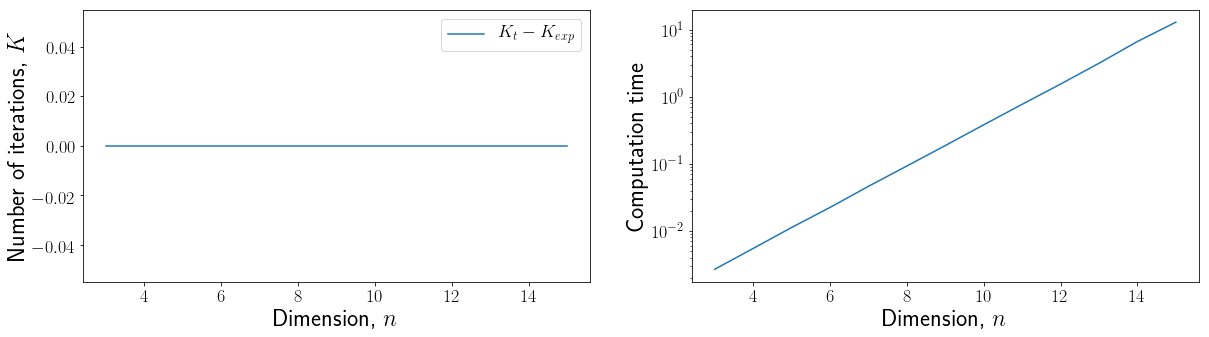

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(n_list, n_iters - np.array([2**n - 1 for n in n_list]), label="$K_t - K_{exp}$")
# plt.semilogy(n_list, [2**n - 1 for n in n_list], label="Theory")
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Number of iterations, $K$", fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

plt.subplot(1, 2, 2)
plt.semilogy(n_list, times)
plt.xlabel("Dimension, $n$", fontsize=24)
plt.ylabel("Computation time", fontsize=24)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

## Recap

- Linear programming problem
- Applications
- Simplex method and its complexity